In [1]:
import pandas as pd
import numpy as np

In [2]:
ab1 = np.load("../input/image-colorization/ab/ab/ab1.npy")
ab2 = np.load("../input/image-colorization/ab/ab/ab2.npy")
ab3 = np.load("../input/image-colorization/ab/ab/ab3.npy")
l = np.load("../input/image-colorization/l/gray_scale.npy")

In [3]:
ab = np.concatenate([ab1, ab2, ab3], axis = 0)

In [4]:
print(ab.shape, l.shape)

(25000, 224, 224, 2) (25000, 224, 224)


Taking only 1000 images for training and 300 for testing (As we're only doing experimentation for now)

In [5]:
l_train = l[:1000,:,:].astype("float32").reshape(1000,l.shape[1],l.shape[2])
l_test = l[1000:1300,:,:].astype("float32").reshape(300,l.shape[1],l.shape[2])
ab_train = ab[:1000,:,:].astype("float32")
ab_test = ab[1000:1300,:,:].astype("float32")
print(l_train.shape, ab_train.shape, l_test.shape, ab_test.shape)

(1000, 224, 224) (1000, 224, 224, 2) (300, 224, 224) (300, 224, 224, 2)


In [6]:
#converting gray scale img of 1 channel to b&w img of 3 channels
import tensorflow as tf
from keras.applications.vgg16 import preprocess_input 
def line_image(gray_images,count, preprocess_function=preprocess_input):
    Zeros_Imp = np.zeros((count,224,224,3))
    for indexing in range(0,3):
        Zeros_Imp[:count,:,:,indexing] = gray_images[:count]
        
    return preprocess_function(Zeros_Imp)

In [7]:
input_images = line_image(l_train,1000)
X_train = input_images
print(X_train.shape)

(1000, 224, 224, 3)


In [8]:
test_input = line_image(l_test, 300)
X_test = test_input
print(X_test.shape)

(300, 224, 224, 3)


In [9]:
# converting y_train and y_test from LAB to RGB
import cv2
def from_lab_to_rgb(gray_images,ab_images,n):
    Zeros_Imp = np.zeros((n,224,224,3))
    
    Zeros_Imp[:,:,:,0] = gray_images[0:n:]
    Zeros_Imp[:,:,:,1:] = ab_images[0:n:]
    
    Zeros_Imp = Zeros_Imp.astype("uint8")
    
    Main_Img = []
    
    for indexing in range(0,n):
        Main_Img.append(cv2.cvtColor(Zeros_Imp[indexing],cv2.COLOR_LAB2RGB))
        
    Main_Img = np.array(Main_Img)
    
    return Main_Img

In [10]:
train_output = preprocess_input(from_lab_to_rgb(l_train,ab_train,n=1000))
y_train = train_output
print(y_train.shape)

(1000, 224, 224, 3)


In [11]:
test_output = preprocess_input(from_lab_to_rgb(l_test, ab_test, n=300))
y_test = test_output
print(y_test.shape)

(300, 224, 224, 3)


In [12]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape) 

(1000, 224, 224, 3)
(1000, 224, 224, 3)
(300, 224, 224, 3)
(300, 224, 224, 3)


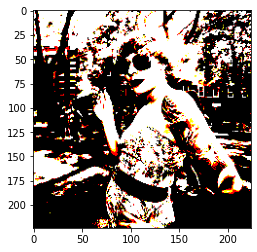

In [13]:
import matplotlib.pyplot as plt
plt.imshow(X_train[0])

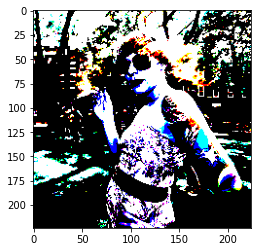

In [14]:
plt.imshow(y_train[0])

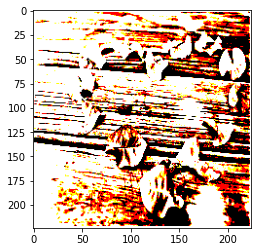

In [15]:
plt.imshow(X_train[1])

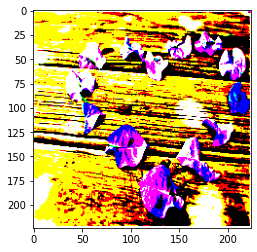

In [16]:
plt.imshow(y_train[1])

# Some random experimentation

In [17]:
ab_train.shape

(1000, 224, 224, 2)

In [18]:
df = np.zeros(shape=(1000,224,224,3))
for indexing in range(len(ab_train)):
    df[:,:,:,0][indexing] = l_train[:,:,:][indexing]
    df[:,:,:,1:][indexing] = ab_train[:,:,:,:][indexing]
df = df.astype("uint8")
df.shape

(1000, 224, 224, 3)

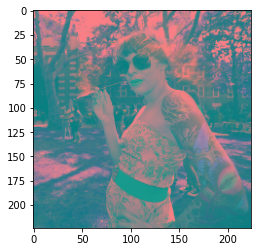

In [19]:
plt.imshow(df[0]) # THIS IS WHAT LAB IMAGES LOOK LIKE

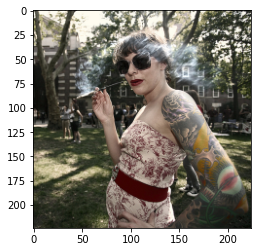

In [20]:
df2 = []
    
for indexing in range(0,1000):
    df2.append(cv2.cvtColor(df[indexing],cv2.COLOR_LAB2RGB))
    
plt.imshow(df2[0])

This colouring is the correct colouring. Don't know what's wrong in the above method. The colored image plotted above is so wrong.